<a href="https://colab.research.google.com/github/rajesha123/samsung/blob/main/project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

load dataset

In [66]:
df = pd.read_csv("software_defects.csv")
df.head()

,code_complexity_cyclomatic,development_time_months,team_size,programming_language,developer_experience_avg_years,code_review_coverage,testing_coverage_percent,project_type,requirements_volatility,version_control_usage,continuous_integration,documentation_quality,customer_involvement,budget_constraints,defect_density_per_kloc
0,43.426546,19.342202,4.0,Python,5.360672,75.139916,NaN,Enterprise,Low,Expert,NaN,Poor,Medium,Moderate,9.010645
1,20.375855,NaN,14.0,C++,8.539208,17.329346,91.354974,Embedded,Low,Advanced,NaN,Excellent,Medium,Moderate,NaN
2,4.954424,10.338738,17.0,JavaScript,14.743924,93.774727,55.054366,Desktop,Medium,Basic,Basic,NaN,High,Severe,5.672287
3,45.427174,17.861228,6.0,NaN,2.343608,29.487048,NaN,Embedded,Low,Expert,NaN,Poor,High,Severe,NaN
4,15.514017,4.892648,20.0,C#,10.397844,0.176905,60.551397,Embedded,Medium,Expert,NaN,Fair,NaN,Severe,4.664320


info

In [67]:
print("Shape:", df.shape)
df.info()

Shape: (1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   code_complexity_cyclomatic      969 non-null    float64
 1   development_time_months         949 non-null    float64
 2   team_size                       949 non-null    float64
 3   programming_language            940 non-null    object 
 4   developer_experience_avg_years  951 non-null    float64
 5   code_review_coverage            949 non-null    float64
 6   testing_coverage_percent        947 non-null    float64
 7   project_type                    962 non-null    object 
 8   requirements_volatility         953 non-null    object 
 9   version_control_usage           946 non-null    object 
 10  continuous_integration          632 non-null    object 
 11  documentation_quality           944 non-null    object 
 12  customer_involvem

missing values

In [68]:
df.isnull().sum()

,0
code_complexity_cyclomatic,31
development_time_months,51
team_size,51
programming_language,60
developer_experience_avg_years,49
code_review_coverage,51
testing_coverage_percent,53
project_type,38
requirements_volatility,47
version_control_usage,54


In [114]:

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
print("Missing values before:\n")
print(df.isnull().sum())


num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include="object").columns


for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)


for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after:\n")
print(df.isnull().sum())


Missing values before:

code_complexity_cyclomatic        0
development_time_months           0
team_size                         0
programming_language              0
developer_experience_avg_years    0
code_review_coverage              0
testing_coverage_percent          0
project_type                      0
requirements_volatility           0
version_control_usage             0
continuous_integration            0
documentation_quality             0
customer_involvement              0
budget_constraints                0
defect_density_per_kloc           0
is_defective                      0
dtype: int64

Missing values after:

code_complexity_cyclomatic        0
development_time_months           0
team_size                         0
programming_language              0
developer_experience_avg_years    0
code_review_coverage              0
testing_coverage_percent          0
project_type                      0
requirements_volatility           0
version_control_usage             0
con

saparate the features and target

In [70]:
X = df.drop("defect_density_per_kloc", axis=1)
y = df["defect_density_per_kloc"]

In [71]:
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include="object").columns

print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: Index(['code_complexity_cyclomatic', 'development_time_months', 'team_size',
       'developer_experience_avg_years', 'code_review_coverage',
       'testing_coverage_percent'],
      dtype='object')
Categorical: Index(['programming_language', 'project_type', 'requirements_volatility',
       'version_control_usage', 'continuous_integration',
       'documentation_quality', 'customer_involvement', 'budget_constraints'],
      dtype='object')


data pre-processing

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   code_complexity_cyclomatic      1000 non-null   float64
 1   development_time_months         1000 non-null   float64
 2   team_size                       1000 non-null   float64
 3   programming_language            1000 non-null   object 
 4   developer_experience_avg_years  1000 non-null   float64
 5   code_review_coverage            1000 non-null   float64
 6   testing_coverage_percent        1000 non-null   float64
 7   project_type                    1000 non-null   object 
 8   requirements_volatility         1000 non-null   object 
 9   version_control_usage           1000 non-null   object 
 10  continuous_integration          1000 non-null   object 
 11  documentation_quality           1000 non-null   object 
 12  customer_involvement            100

OLS model

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   code_complexity_cyclomatic      1000 non-null   float64
 1   development_time_months         1000 non-null   float64
 2   team_size                       1000 non-null   float64
 3   programming_language            1000 non-null   object 
 4   developer_experience_avg_years  1000 non-null   float64
 5   code_review_coverage            1000 non-null   float64
 6   testing_coverage_percent        1000 non-null   float64
 7   project_type                    1000 non-null   object 
 8   requirements_volatility         1000 non-null   object 
 9   version_control_usage           1000 non-null   object 
 10  continuous_integration          1000 non-null   object 
 11  documentation_quality           1000 non-null   object 
 12  customer_involvement            100

In [74]:
x=df.drop(['programming_language','project_type','requirements_volatility','version_control_usage','continuous_integration','documentation_quality','customer_involvement','budget_constraints','defect_density_per_kloc'],axis=1)
y=df['defect_density_per_kloc']

In [75]:
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     defect_density_per_kloc   R-squared:                       0.008
Model:                                 OLS   Adj. R-squared:                  0.002
Method:                      Least Squares   F-statistic:                     1.380
Date:                     Wed, 11 Feb 2026   Prob (F-statistic):              0.219
Time:                             04:43:02   Log-Likelihood:                -2449.8
No. Observations:                     1000   AIC:                             4914.
Df Residuals:                          993   BIC:                             4948.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [76]:
df1=pd.get_dummies(df)

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   code_complexity_cyclomatic       1000 non-null   float64
 1   development_time_months          1000 non-null   float64
 2   team_size                        1000 non-null   float64
 3   developer_experience_avg_years   1000 non-null   float64
 4   code_review_coverage             1000 non-null   float64
 5   testing_coverage_percent         1000 non-null   float64
 6   defect_density_per_kloc          1000 non-null   float64
 7   programming_language_C#          1000 non-null   bool   
 8   programming_language_C++         1000 non-null   bool   
 9   programming_language_Java        1000 non-null   bool   
 10  programming_language_JavaScript  1000 non-null   bool   
 11  programming_language_Python      1000 non-null   bool   
 12  project_type_Desktop 

In [78]:
for i in df1.columns:
  df1[i]=df1[i].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   code_complexity_cyclomatic       1000 non-null   float64
 1   development_time_months          1000 non-null   float64
 2   team_size                        1000 non-null   float64
 3   developer_experience_avg_years   1000 non-null   float64
 4   code_review_coverage             1000 non-null   float64
 5   testing_coverage_percent         1000 non-null   float64
 6   defect_density_per_kloc          1000 non-null   float64
 7   programming_language_C#          1000 non-null   float64
 8   programming_language_C++         1000 non-null   float64
 9   programming_language_Java        1000 non-null   float64
 10  programming_language_JavaScript  1000 non-null   float64
 11  programming_language_Python      1000 non-null   float64
 12  project_type_Desktop 

In [79]:
x=df1.drop("defect_density_per_kloc",axis=1)
y=df1["defect_density_per_kloc"]

In [80]:
import statsmodels.api as sm
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     defect_density_per_kloc   R-squared:                       0.032
Model:                                 OLS   Adj. R-squared:                  0.007
Method:                      Least Squares   F-statistic:                     1.294
Date:                     Wed, 11 Feb 2026   Prob (F-statistic):              0.152
Time:                             04:43:02   Log-Likelihood:                -2437.6
No. Observations:                     1000   AIC:                             4927.
Df Residuals:                          974   BIC:                             5055.
Df Model:                               25                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

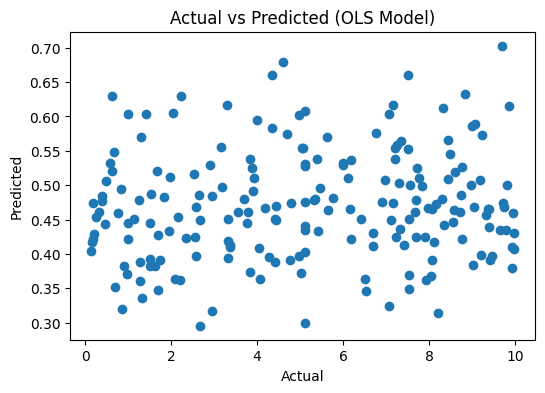

In [81]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (OLS Model)")
plt.show()

Data Analysis

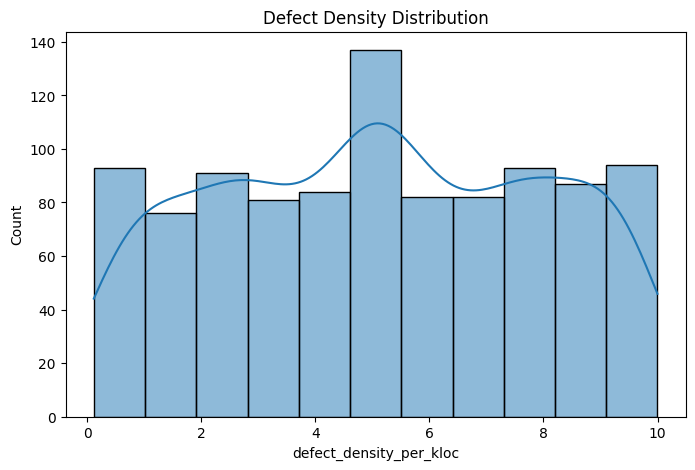

In [96]:
plt.figure(figsize=(8,5))
sns.histplot(df1["defect_density_per_kloc"], kde=True)
plt.title("Defect Density Distribution")
plt.show()

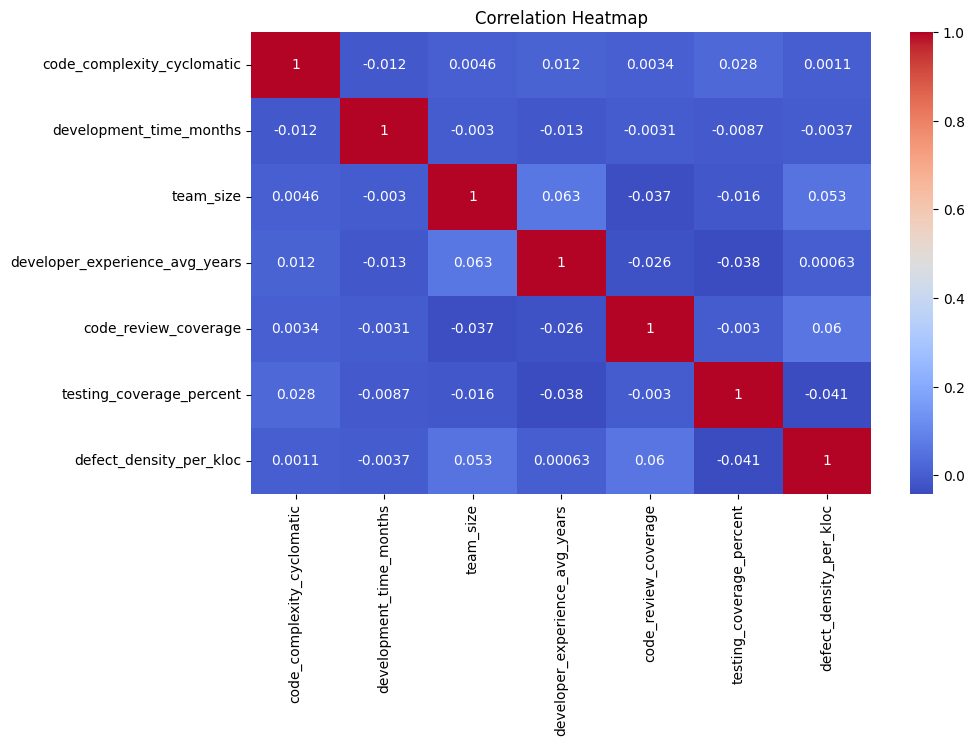

In [95]:
plt.figure(figsize=(10,6))
sns.heatmap(df1[num_cols.tolist() + ["defect_density_per_kloc"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

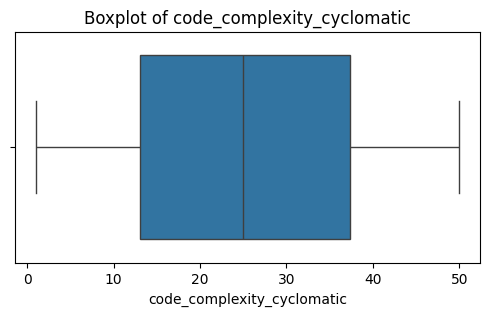

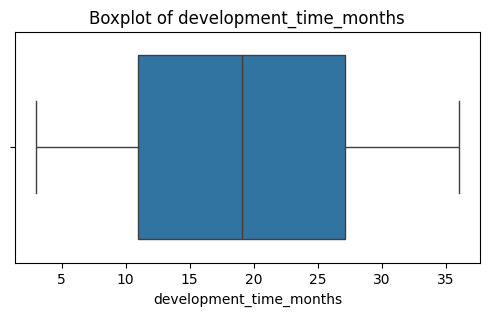

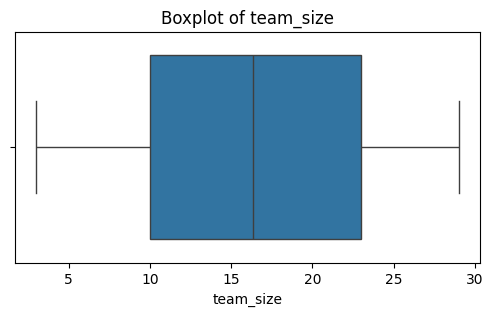

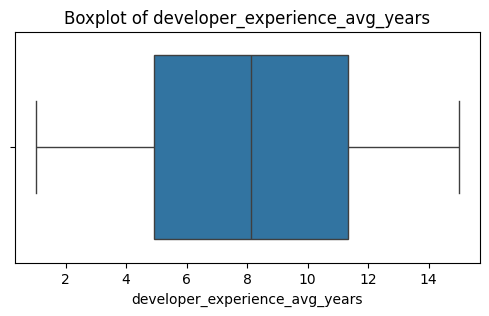

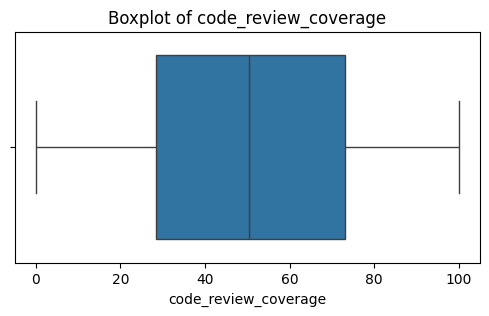

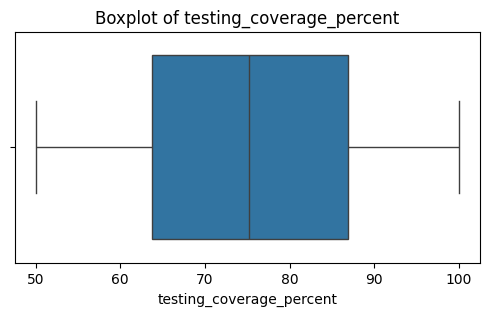

In [97]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [100]:
cat_cols = df1.select_dtypes(include=["object"]).columns
cat_cols

Index([], dtype='object')

In [103]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(y=df1[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

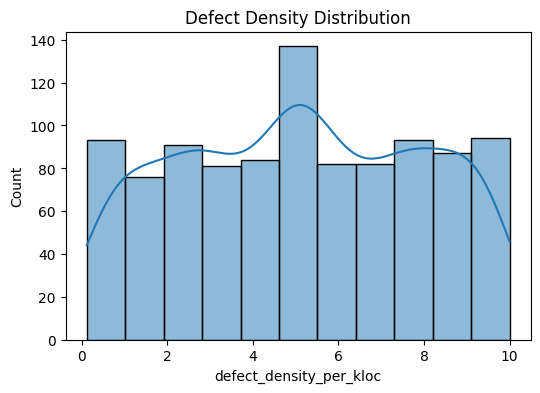

In [102]:
plt.figure(figsize=(6,4))
sns.histplot(df1["defect_density_per_kloc"], kde=True)
plt.title("Defect Density Distribution")
plt.show()

CLASIFICATION USING ML
CLASSIFICATION USING NUERAL NETWORK


In [106]:
# Create binary classification label from defect density

threshold = df1["defect_density_per_kloc"].median()

df1["is_defective"] = (df1["defect_density_per_kloc"] > threshold).astype(int)

print(df1["is_defective"].value_counts())


is_defective
0    525
1    475
Name: count, dtype: int64


In [109]:
df1["defect_density_per_kloc"].median()

5.103023265922223

In [111]:
# Features (remove original regression target)
X = df1.drop(["defect_density_per_kloc", "is_defective"], axis=1)
y = df1["is_defective"]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   code_complexity_cyclomatic       1000 non-null   float64
 1   development_time_months          1000 non-null   float64
 2   team_size                        1000 non-null   float64
 3   developer_experience_avg_years   1000 non-null   float64
 4   code_review_coverage             1000 non-null   float64
 5   testing_coverage_percent         1000 non-null   float64
 6   defect_density_per_kloc          1000 non-null   float64
 7   programming_language_C#          1000 non-null   float64
 8   programming_language_C++         1000 non-null   float64
 9   programming_language_Java        1000 non-null   float64
 10  programming_language_JavaScript  1000 non-null   float64
 11  programming_language_Python      1000 non-null   float64
 12  project_type_Desktop 

In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [90]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Build Model
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train_res, y_train_res)

# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       105
           1       0.45      0.44      0.45        95

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:

[[54 51]
 [53 42]]
ROC-AUC Score: 0.49177944862155387


Top 10 Important Features:

code_complexity_cyclomatic        0.119800
code_review_coverage              0.118805
testing_coverage_percent          0.117509
development_time_months           0.117026
developer_experience_avg_years    0.114398
team_size                         0.097028
version_control_usage_Expert      0.019750
requirements_volatility_Low       0.018509
customer_involvement_Medium       0.018498
budget_constraints_Severe         0.018400
dtype: float64


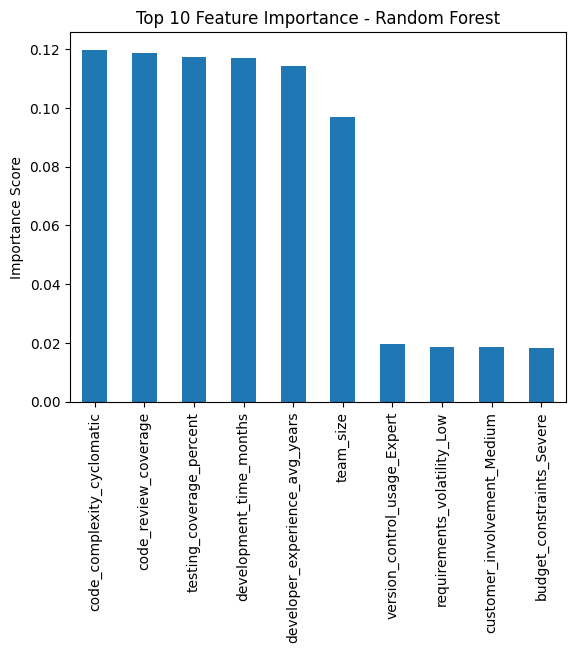

In [92]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Top 10 Important Features:\n")
print(feat_imp.head(10))

feat_imp.head(10).plot(kind="bar")
plt.title("Top 10 Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()


In [120]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Build Model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),

    layers.Dense(1, activation='sigmoid')   # Binary Classification
])

# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

# Early Stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4845 - auc_5: 0.5003 - loss: 2.8900 - val_accuracy: 0.4688 - val_auc_5: 0.4398 - val_loss: 0.8816
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4938 - auc_5: 0.4960 - loss: 1.6113 - val_accuracy: 0.4437 - val_auc_5: 0.4238 - val_loss: 0.7335
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4519 - auc_5: 0.4232 - loss: 1.1915 - val_accuracy: 0.4313 - val_auc_5: 0.4046 - val_loss: 0.7424
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5127 - auc_5: 0.4636 - loss: 0.9523 - val_accuracy: 0.4812 - val_auc_5: 0.4349 - val_loss: 0.7445
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5104 - auc_5: 0.5056 - loss: 0.8918 - val_accuracy: 0.4812 - val_auc_5: 0.4938 - val_loss: 0.7104
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5021 - auc_5: 0.4915 - loss: 0.8508 - val_accuracy: 0.4688 - val_auc_5: 0.5176 - val_loss: 0.7102
Epoch 7/100
20/20 ━━━

In [121]:
# Evaluate
loss, accuracy, auc = model.evaluate(X_test, y_test)

print("Test Accuracy:", accuracy)
print("Test AUC:", auc)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4912 - auc_5: 0.4099 - loss: 0.6982 
Test Accuracy: 0.4950000047683716
Test AUC: 0.43709272146224976
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.86      0.64       105
           1       0.38      0.09      0.15        95

    accuracy                           0.49       200
   macro avg       0.44      0.48      0.40       200
weighted avg       0.45      0.49      0.41       200

Confusion Matrix:

[[90 15]
 [86  9]]


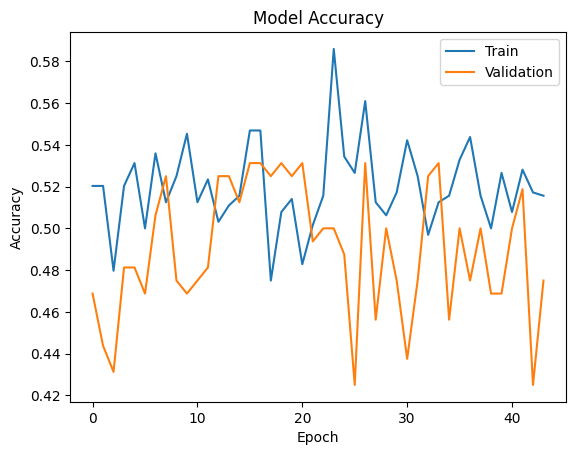

In [122]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()
